In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from scripts.filters import *

In [2]:
datas = (7, 11, 66, 96)

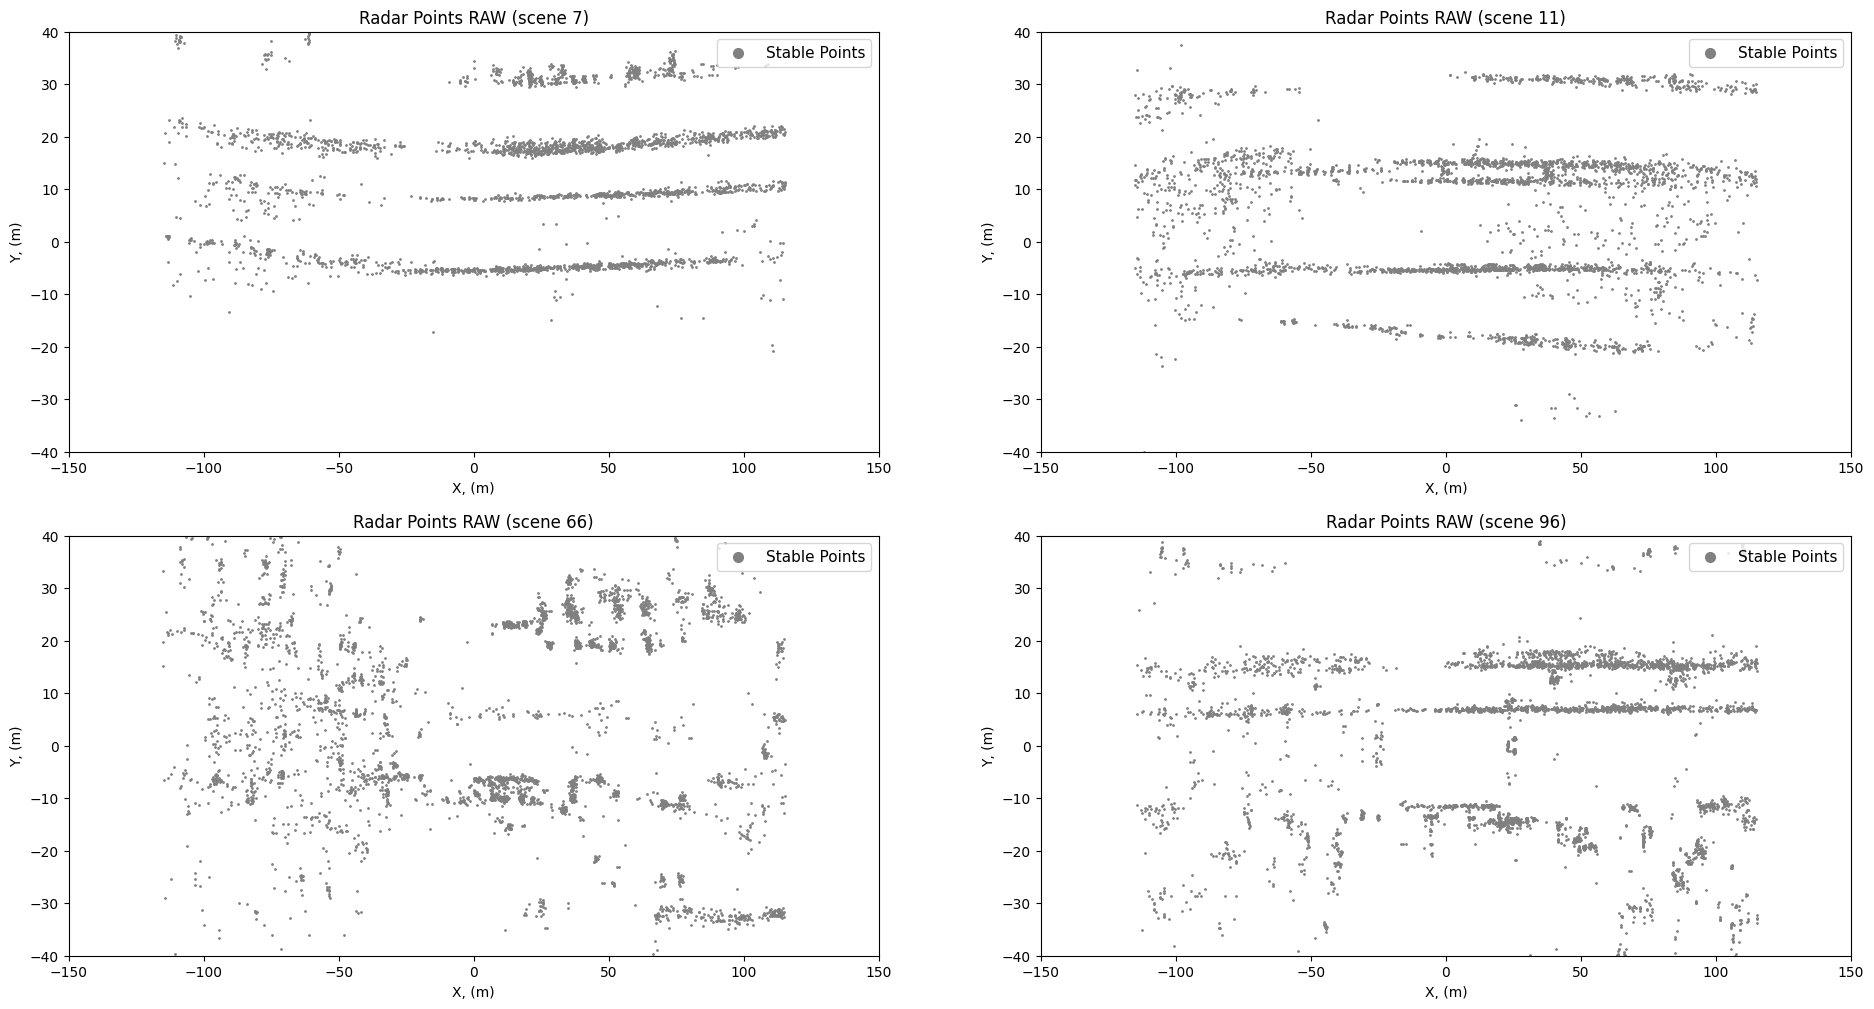

In [29]:
plt.figure(figsize=(23, 12))
for ind, i in enumerate(datas):
    radar_df = pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    # radar_df_c = DeltaTimeFix().apply(radar_df.copy(deep=True))

    radar_df_slow = VelocityFilter().apply(radar_df, 1.5, True)
    # radar_df_c_fast = VelocityFilter().apply(radar_df_c, 1.5)

    plt.subplot(2, 2, ind + 1)
    plt.title(f"Radar Points RAW (scene {i})")
    plt.xlim([-150, 150])
    plt.ylim([-40, 40])
    plt.xlabel("X, (m)")
    plt.ylabel("Y, (m)")
    plt.scatter(
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="grey",
        s=1,
        label="Stable Points",
    )
    # plt.scatter(
    #     radar_df_fast[
    #         (np.abs(radar_df_fast["Y, (m)"]) < 40)
    #         & (np.abs(radar_df_fast["X, (m)"]) < 150)
    #     ]["X, (m)"],
    #     radar_df_fast[
    #         (np.abs(radar_df_fast["Y, (m)"]) < 40)
    #         & (np.abs(radar_df_fast["X, (m)"]) < 150)
    #     ]["Y, (m)"],
    #     color="white",
    #     s=1,
    #     label="Moving Points",
    # )
    plt.legend(fontsize=11, markerscale=7, loc="upper right")

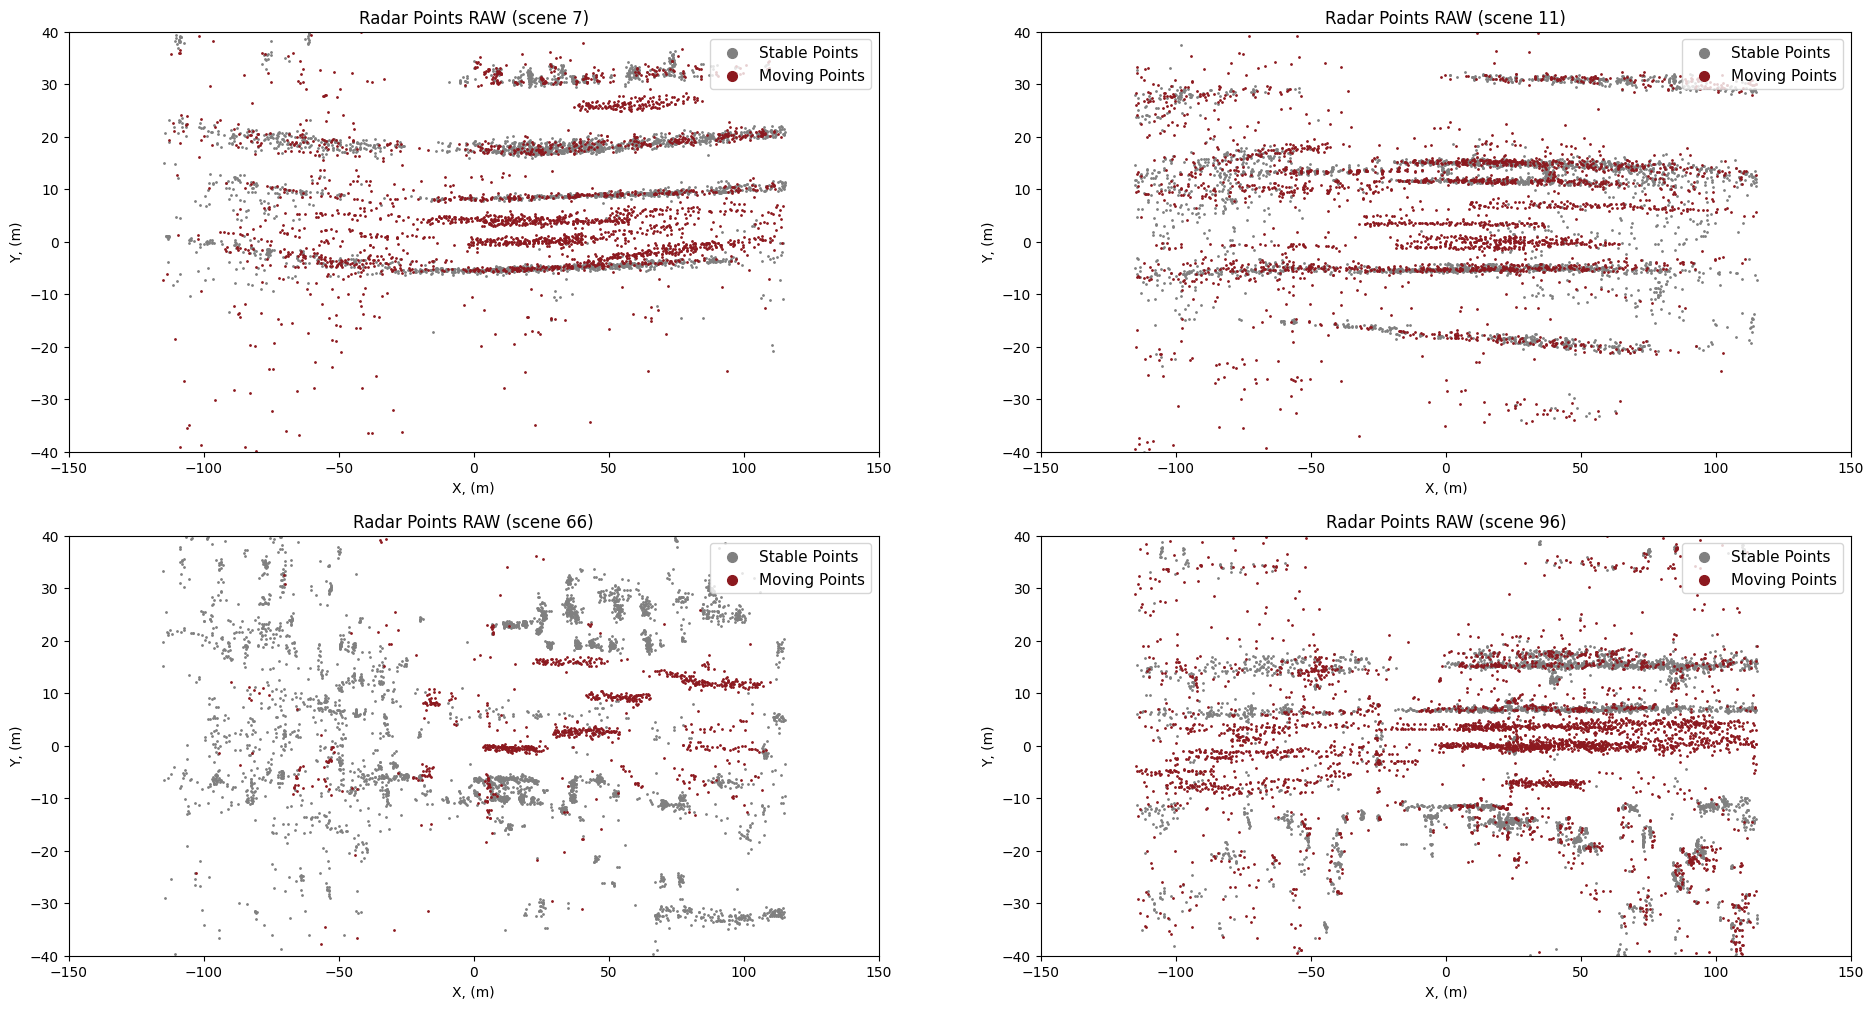

In [30]:
plt.figure(figsize=(23, 12))
for ind, i in enumerate(datas):
    radar_df = pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    # radar_df_c = DeltaTimeFix().apply(radar_df.copy(deep=True))

    radar_df_slow = VelocityFilter().apply(radar_df, 1.5, True)
    radar_df_fast = VelocityFilter().apply(radar_df, 1.5)

    plt.subplot(2, 2, ind + 1)
    plt.title(f"Radar Points RAW (scene {i})")
    plt.xlim([-150, 150])
    plt.ylim([-40, 40])
    plt.xlabel("X, (m)")
    plt.ylabel("Y, (m)")
    plt.scatter(
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="grey",
        s=1,
        label="Stable Points",
    )
    plt.scatter(
        radar_df_fast[
            (np.abs(radar_df_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_fast[
            (np.abs(radar_df_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color=(0.549, 0.098, 0.122, 1),
        s=1,
        label="Moving Points",
    )
    plt.legend(fontsize=11, markerscale=7, loc="upper right")

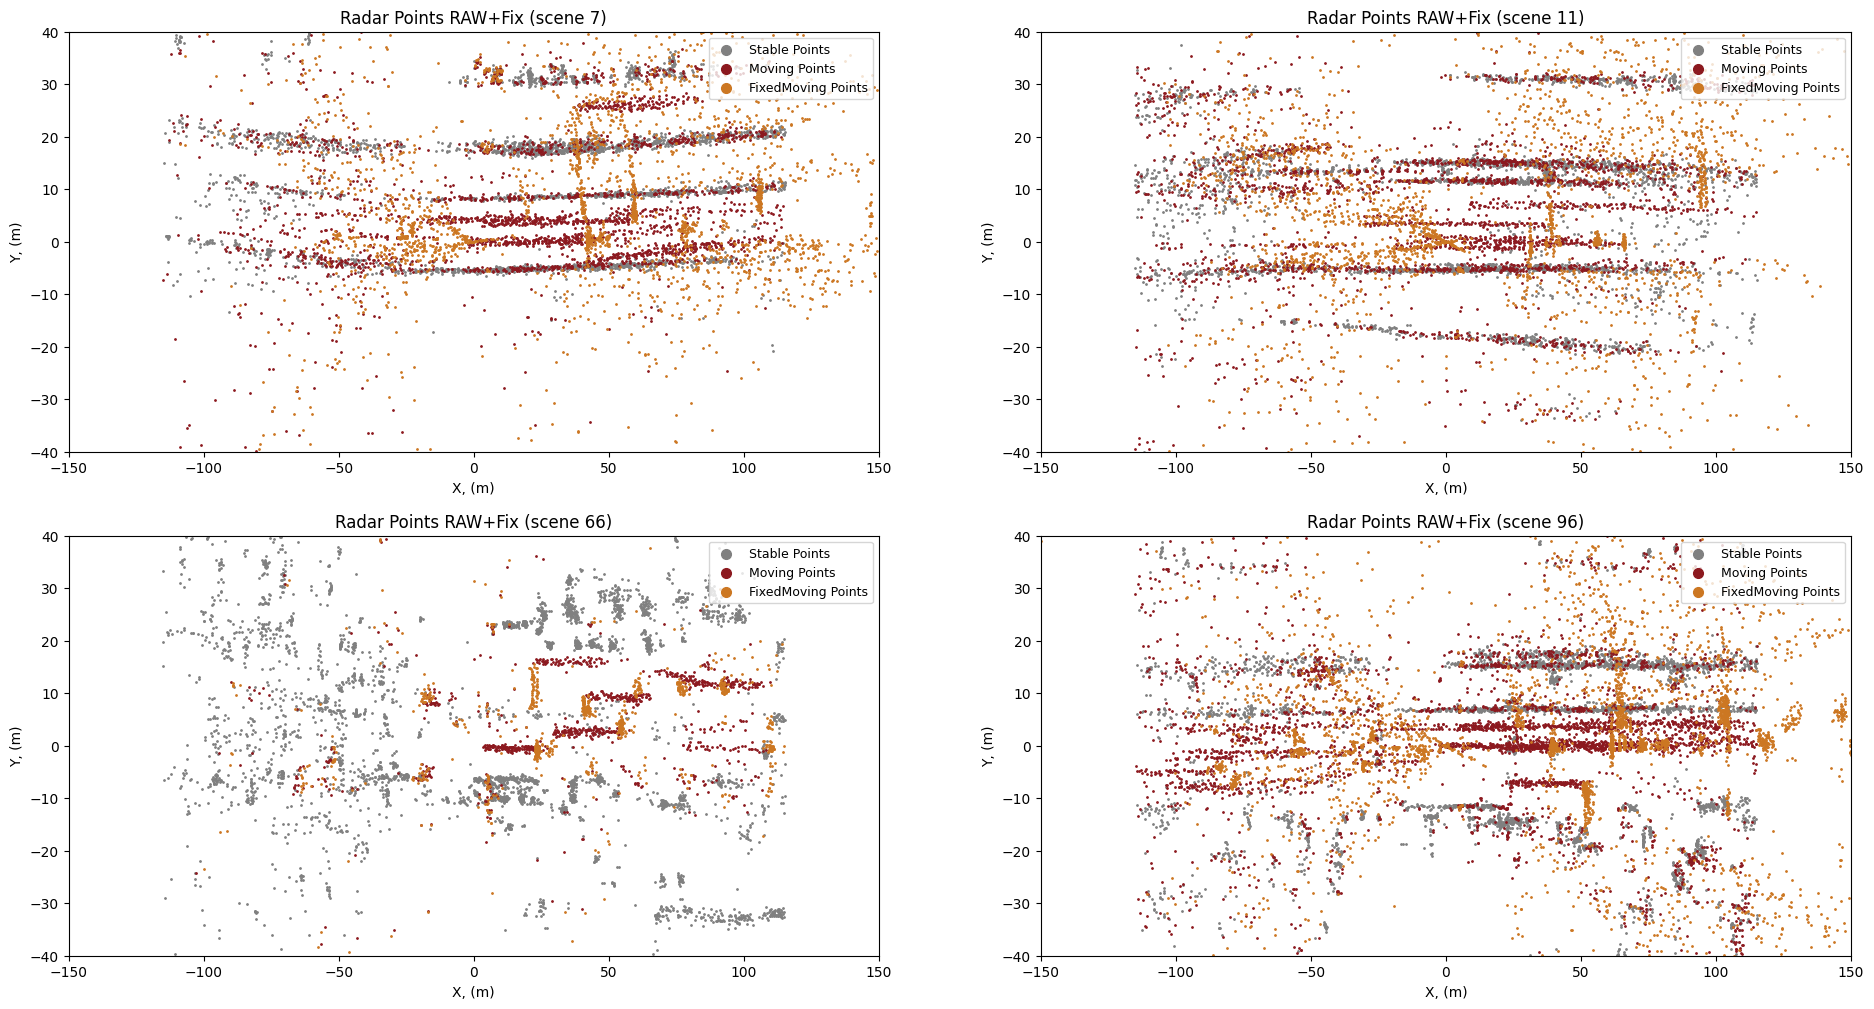

In [31]:
plt.figure(figsize=(23, 12))
for ind, i in enumerate(datas):
    radar_df = pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    radar_df_c = DeltaTimeFix().apply(radar_df.copy(deep=True))

    radar_df_slow = VelocityFilter().apply(radar_df, 1.5, True)
    radar_df_fast = VelocityFilter().apply(radar_df, 1.5)
    radar_df_c_slow = VelocityFilter().apply(radar_df_c, 1.5, True)
    radar_df_c_fast = VelocityFilter().apply(radar_df_c, 1.5)

    plt.subplot(2, 2, ind + 1)
    plt.title(f"Radar Points RAW+Fix (scene {i})")
    plt.xlim([-150, 150])
    plt.ylim([-40, 40])
    plt.xlabel("X, (m)")
    plt.ylabel("Y, (m)")

    plt.scatter(
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="grey",
        s=1,
        label="Stable Points",
    )
    # plt.scatter(
    #     radar_df_c_slow[
    #         (np.abs(radar_df_c_slow["Y, (m)"]) < 40)
    #         & (np.abs(radar_df_c_slow["X, (m)"]) < 150)
    #     ]["X, (m)"],
    #     radar_df_c_slow[
    #         (np.abs(radar_df_c_slow["Y, (m)"]) < 40)
    #         & (np.abs(radar_df_c_slow["X, (m)"]) < 150)
    #     ]["Y, (m)"],
    #     color="grey",
    #     s=1,
    #     label="Stable Points",
    # )
    plt.scatter(
        radar_df_fast[
            (np.abs(radar_df_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_fast[
            (np.abs(radar_df_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color=(0.549, 0.098, 0.122, 1),
        s=1,
        label="Moving Points",
    )
    plt.scatter(
        radar_df_c_fast[
            (np.abs(radar_df_c_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_c_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_c_fast[
            (np.abs(radar_df_c_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_c_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color=(0.8, 0.467, 0.133, 1),
        s=1,
        label="FixedMoving Points",
    )
    plt.legend(fontsize=9, markerscale=7, loc="upper right")

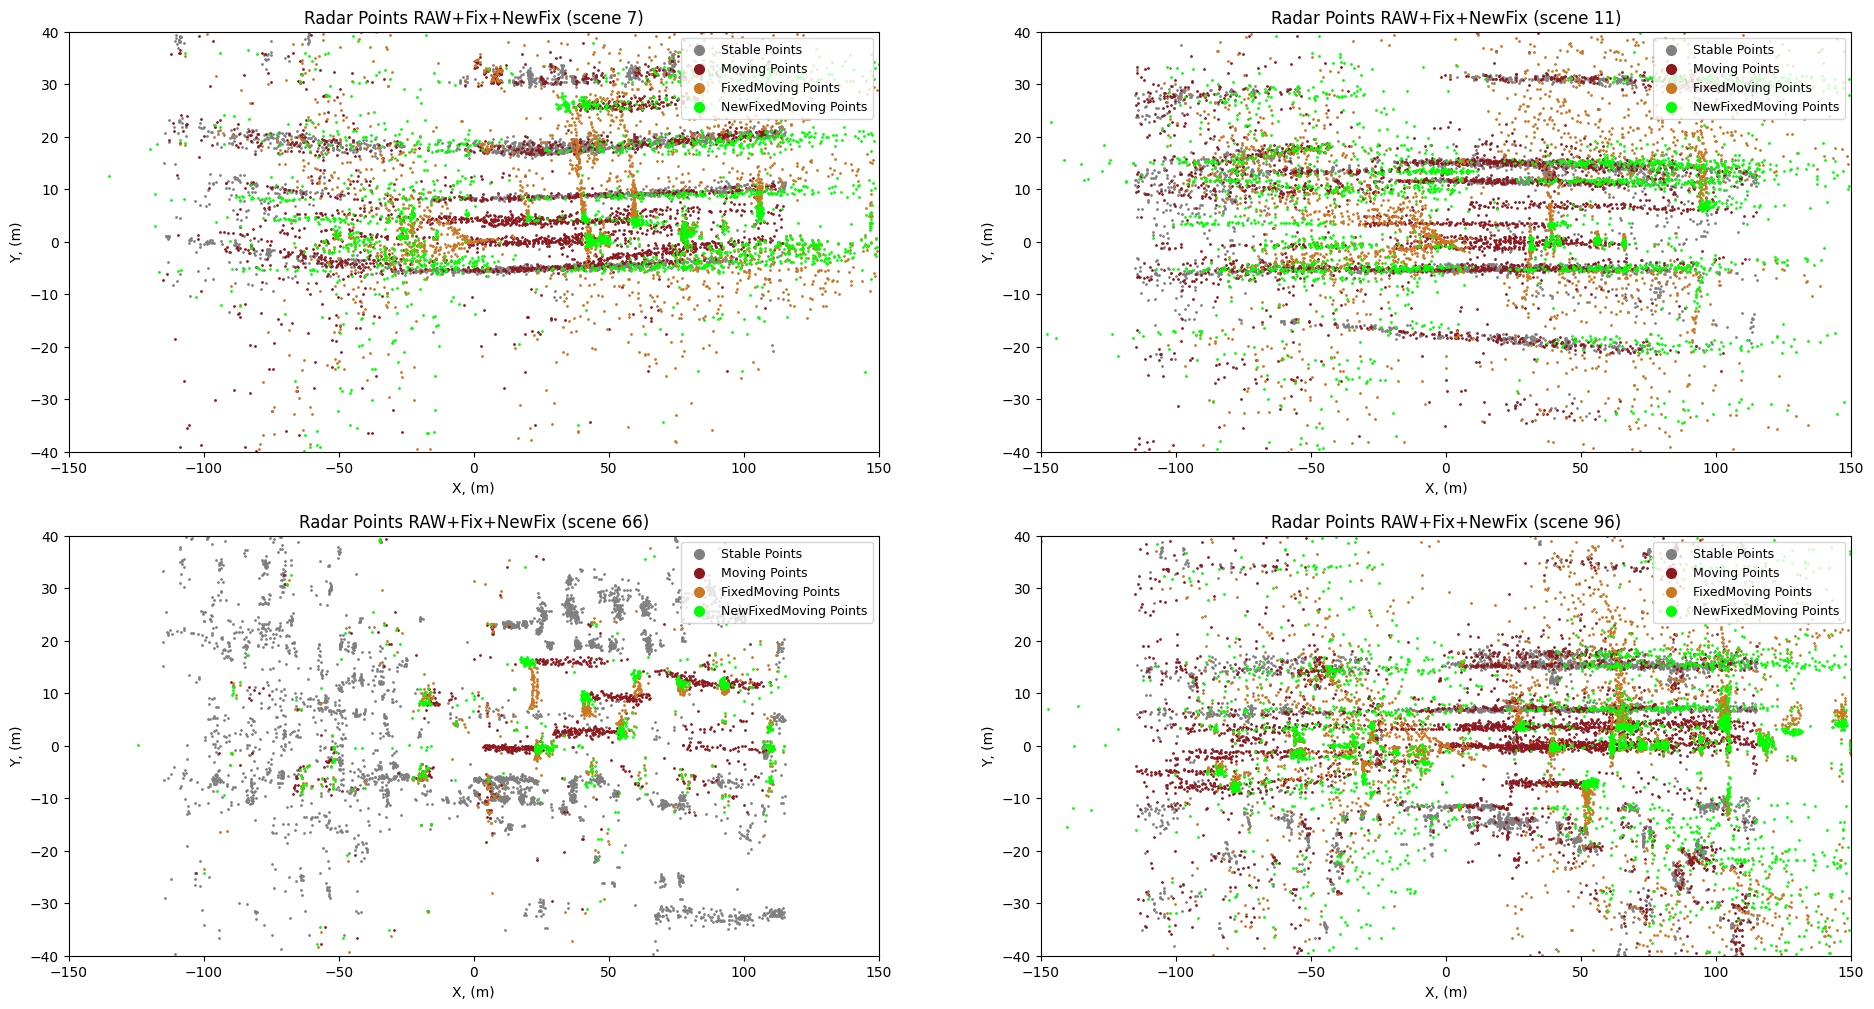

In [32]:
plt.figure(figsize=(23, 12))
for ind, i in enumerate(datas):
    radar_df = pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    radar_df_c = DeltaTimeFix().apply(radar_df.copy(deep=True))
    radar_df_cc = DeltaTimeFixPredict().apply(radar_df.copy(deep=True))

    radar_df_slow = VelocityFilter().apply(radar_df, 1.5, True)
    radar_df_fast = VelocityFilter().apply(radar_df, 1.5)
    radar_df_c_fast = VelocityFilter().apply(radar_df_c, 1.5)
    radar_df_cc_fast = VelocityFilter().apply(radar_df_cc, 1.5)

    plt.subplot(2, 2, ind + 1)
    plt.title(f"Radar Points RAW+Fix+NewFix (scene {i})")
    plt.xlim([-150, 150])
    plt.ylim([-40, 40])
    plt.xlabel("X, (m)")
    plt.ylabel("Y, (m)")

    plt.scatter(
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="grey",
        s=1,
        label="Stable Points",
    )
    plt.scatter(
        radar_df_fast[
            (np.abs(radar_df_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_fast[
            (np.abs(radar_df_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color=(0.549, 0.098, 0.122, 1),
        s=1,
        label="Moving Points",
    )
    plt.scatter(
        radar_df_c_fast[
            (np.abs(radar_df_c_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_c_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_c_fast[
            (np.abs(radar_df_c_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_c_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color=(0.8, 0.467, 0.133, 1),
        s=1,
        label="FixedMoving Points",
    )
    plt.scatter(
        radar_df_cc_fast[
            (np.abs(radar_df_cc_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_cc_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_cc_fast[
            (np.abs(radar_df_cc_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_cc_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="lime",
        s=1,
        label="NewFixedMoving Points",
    )
    plt.legend(fontsize=9, markerscale=7, loc="upper right")

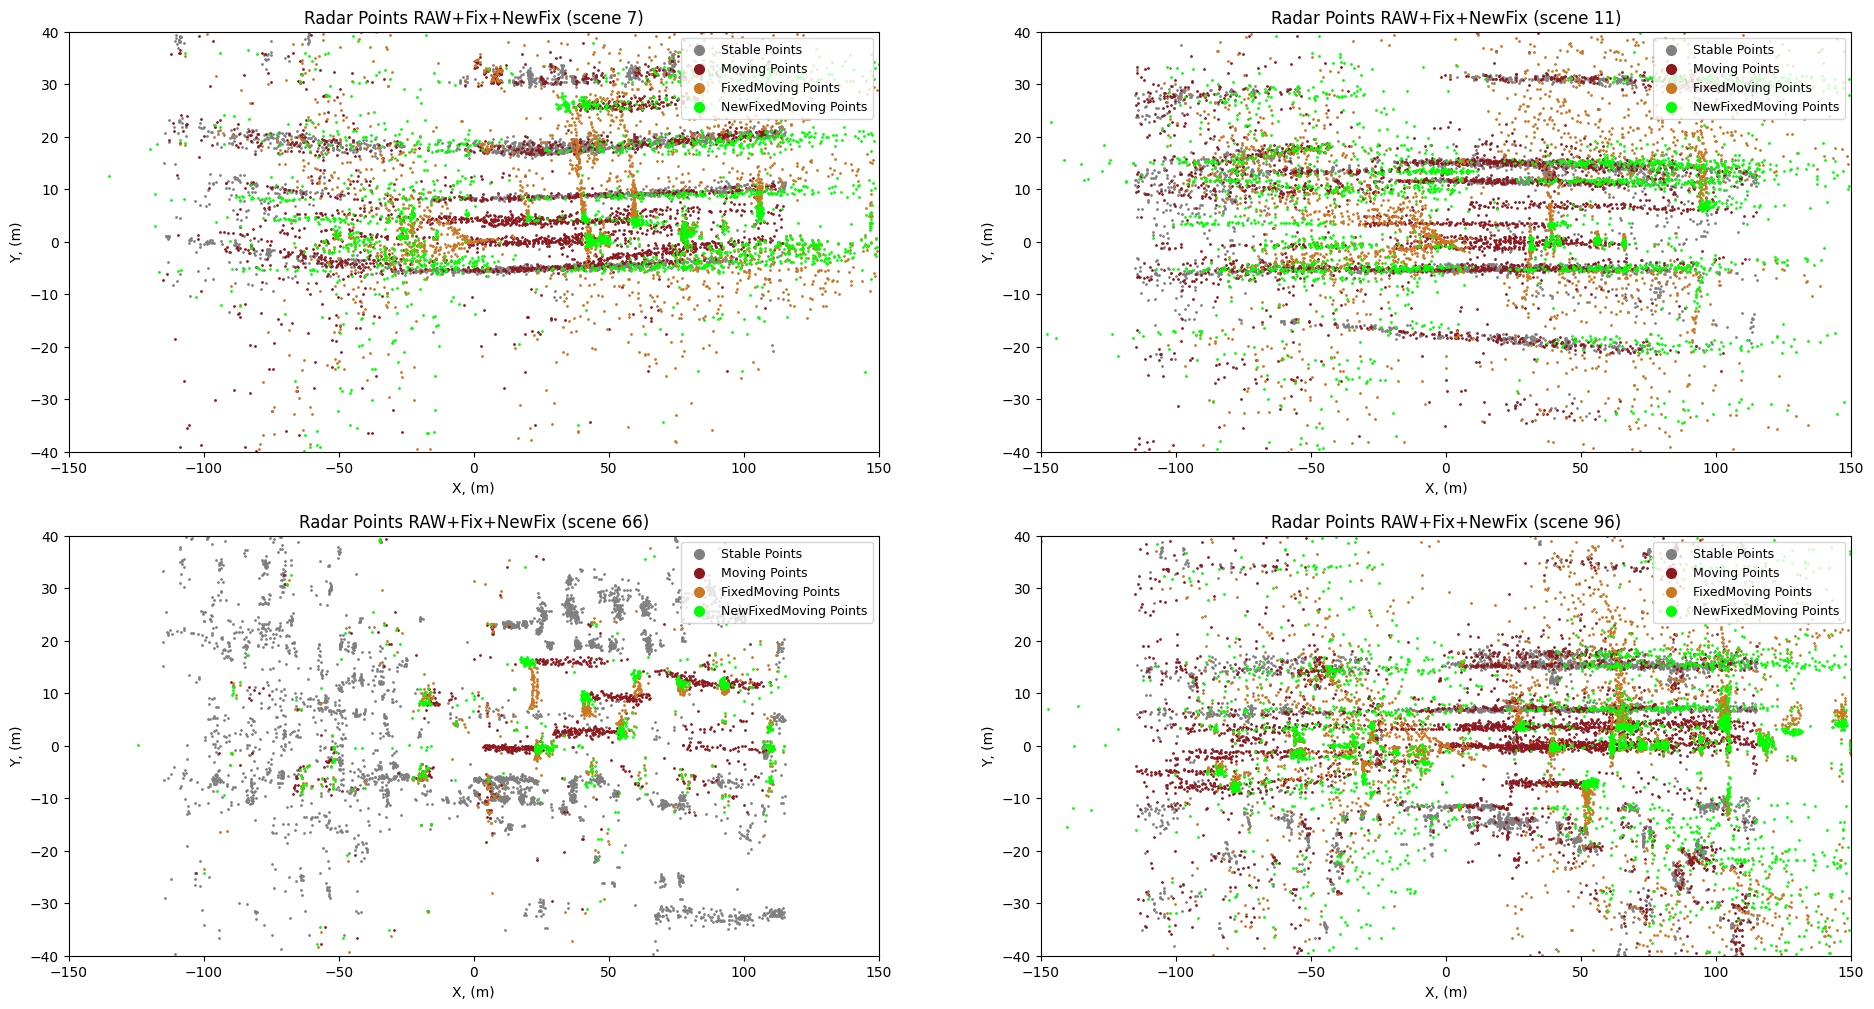

In [ ]:
plt.figure(figsize=(23, 12))
for ind, i in enumerate(datas):
    radar_df = pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    radar_df_c = DeltaTimeFix().apply(radar_df.copy(deep=True))
    radar_df_cc = DeltaTimeFixPredict().apply(radar_df.copy(deep=True))

    radar_df_slow = VelocityFilter().apply(radar_df, 1.5, True)
    radar_df_fast = VelocityFilter().apply(radar_df, 1.5)
    radar_df_c_fast = VelocityFilter().apply(radar_df_c, 1.5)
    radar_df_cc_fast = VelocityFilter().apply(radar_df_cc, 1.5)

    plt.subplot(2, 2, ind + 1)
    plt.title(f"Radar Points RAW+Fix+NewFix (scene {i})")
    plt.xlim([-150, 150])
    plt.ylim([-40, 40])
    plt.xlabel("X, (m)")
    plt.ylabel("Y, (m)")

    plt.scatter(
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_slow[
            (np.abs(radar_df_slow["Y, (m)"]) < 40)
            & (np.abs(radar_df_slow["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="grey",
        s=1,
        label="Stable Points",
    )
    plt.scatter(
        radar_df_fast[
            (np.abs(radar_df_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_fast[
            (np.abs(radar_df_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color=(0.549, 0.098, 0.122, 1),
        s=1,
        label="Moving Points",
    )
    plt.scatter(
        radar_df_c_fast[
            (np.abs(radar_df_c_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_c_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_c_fast[
            (np.abs(radar_df_c_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_c_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color=(0.8, 0.467, 0.133, 1),
        s=1,
        label="FixedMoving Points",
    )
    plt.scatter(
        radar_df_cc_fast[
            (np.abs(radar_df_cc_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_cc_fast["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_cc_fast[
            (np.abs(radar_df_cc_fast["Y, (m)"]) < 40)
            & (np.abs(radar_df_cc_fast["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="lime",
        s=1,
        label="NewFixedMoving Points",
    )
    plt.legend(fontsize=9, markerscale=7, loc="upper right")

фильтры

0.5595846101464079
0.5259212991880075


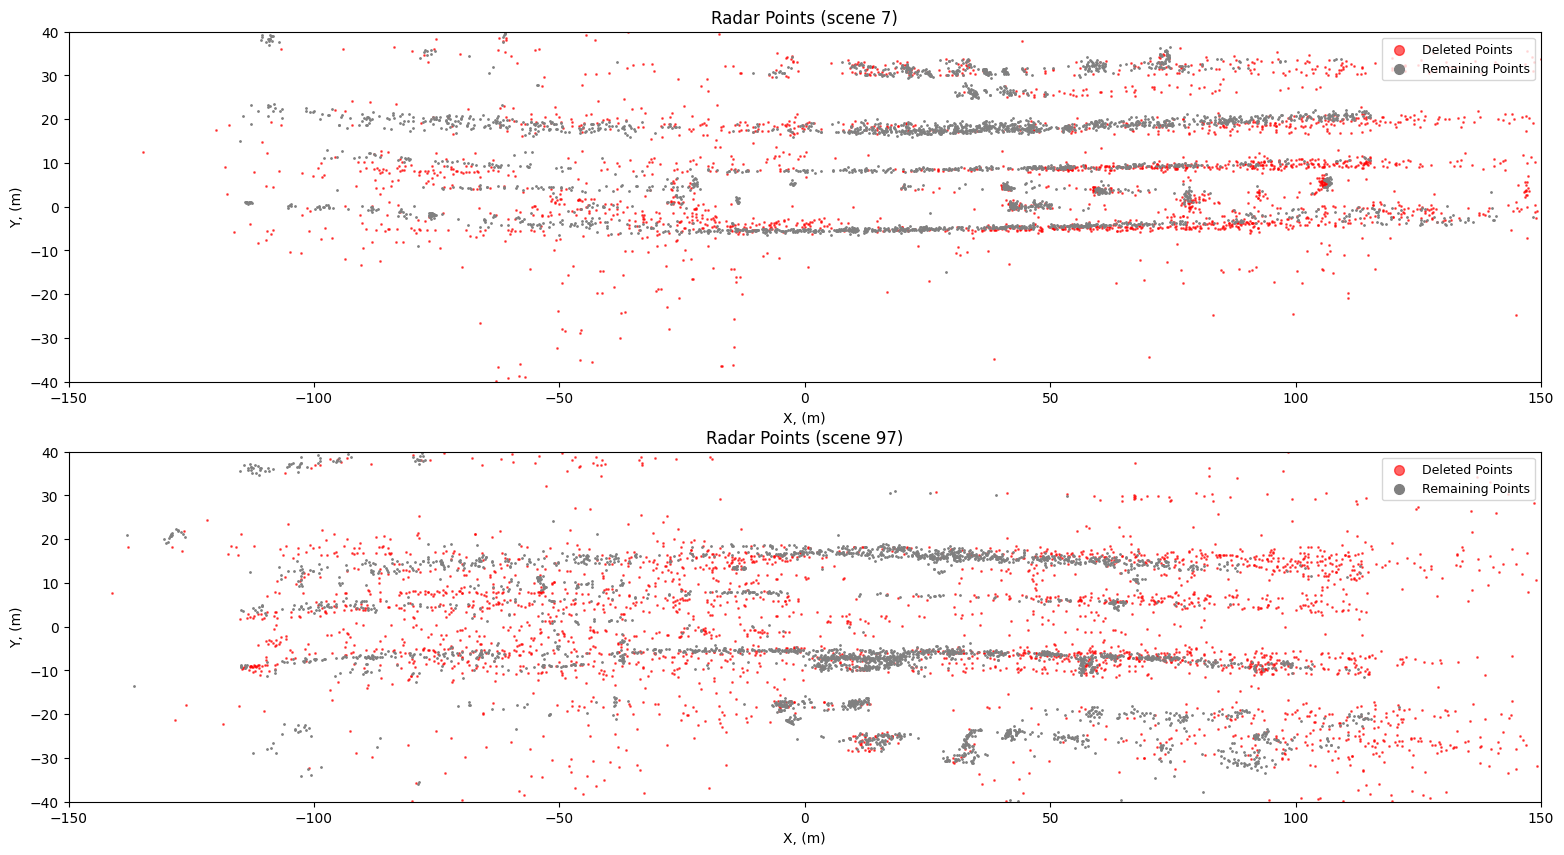

In [9]:
plt.figure(figsize=(19, 10))
datas = (7, 97)
for ind, i in enumerate(datas):
    radar_df = DeltaTimeFixPredict().apply(
        pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    )
    radar_df_c = UltimateFilter().apply(radar_df.copy(deep=True))
    print(len(radar_df_c) / len(radar_df))
    mask = radar_df.index.isin(radar_df_c.index)
    radar_df = radar_df[~mask]

    plt.subplot(2, 1, ind + 1)
    plt.title(f"Radar Points (scene {i})")
    plt.xlim([-150, 150])
    plt.ylim([-40, 40])
    plt.xlabel("X, (m)")
    plt.ylabel("Y, (m)")

    plt.scatter(
        radar_df[
            (np.abs(radar_df["Y, (m)"]) < 40) & (np.abs(radar_df["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df[
            (np.abs(radar_df["Y, (m)"]) < 40) & (np.abs(radar_df["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="red",
        alpha=0.6,
        s=1,
        label="Deleted Points",
    )
    plt.scatter(
        radar_df_c[
            (np.abs(radar_df_c["Y, (m)"]) < 40) & (np.abs(radar_df_c["X, (m)"]) < 150)
        ]["X, (m)"],
        radar_df_c[
            (np.abs(radar_df_c["Y, (m)"]) < 40) & (np.abs(radar_df_c["X, (m)"]) < 150)
        ]["Y, (m)"],
        color="grey",
        s=1,
        label="Remaining Points",
    )

    plt.legend(fontsize=9, markerscale=7, loc="upper right")